Importando Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Importando o dataset de treino

In [2]:
treino = pd.read_csv('../arquivos/train.csv')

In [3]:
treino.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Analisando o dataset

In [4]:
treino.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Adicionando biblioteca na coluna Sexo

In [59]:
sexo = {'male' : 1, 'female':2}
treino['Sex'] = treino['Sex'].map(sexo, na_action=None)

Criando uma coluna calculada

In [74]:
treino['Familia'] = treino['SibSp'] + treino['Parch']

Avaliando Correlação

In [75]:
treino.corr()

C:\Users\PICHAU\AppData\Local\Temp\ipykernel_12760\3327097654.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  treino.corr()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Parentes,Familia
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.036847,-0.057527,-0.001652,0.012658,-0.040143,-0.040143
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.077221,-0.035322,0.081629,0.257307,0.016639,0.016639
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.369226,0.083081,0.018443,-0.549500,0.065997,0.065997
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.093254,0.114631,0.245489,0.182333,0.200988,0.200988
Age,0.036847,-0.077221,-0.369226,-0.093254,1.000000,-0.308247,-0.189119,0.096067,-0.301914,-0.301914
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.308247,1.000000,0.414838,0.159651,0.890712,0.890712
Parch,-0.001652,0.081629,0.018443,0.245489,-0.189119,0.414838,1.000000,0.216225,0.783111,0.783111
Fare,0.012658,0.257307,-0.549500,0.182333,0.096067,0.159651,0.216225,1.000000,0.217138,0.217138
Parentes,-0.040143,0.016639,0.065997,0.200988,-0.301914,0.890712,0.783111,0.217138,1.000000,1.000000
Familia,-0.040143,0.016639,0.065997,0.200988,-0.301914,0.890712,0.783111,0.217138,1.000000,1.000000


Adicionando coluna calculada

In [76]:
treino.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Parentes,Familia
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,C85,C,1,1
2,3,1,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,C123,S,1,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,0,0


Analisando correlação

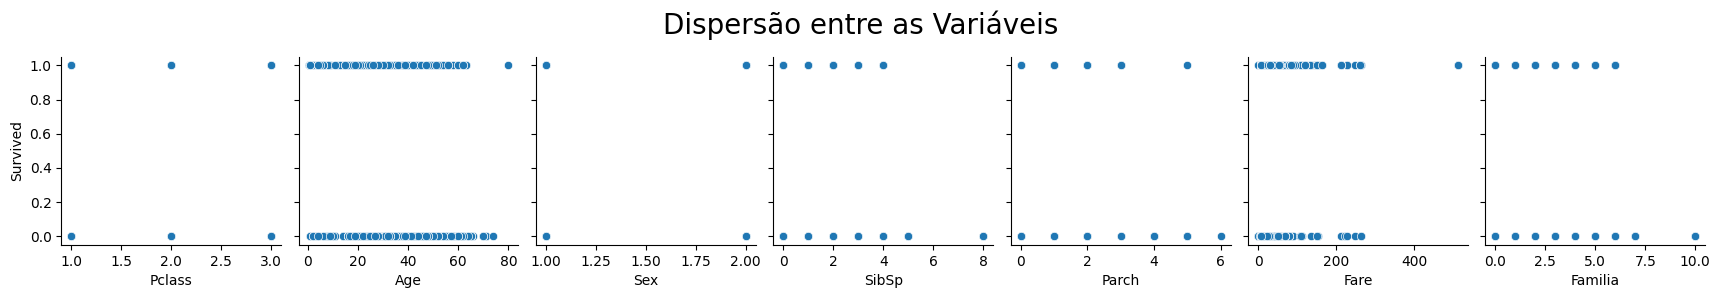

In [77]:
ax = sns.pairplot(data=treino, y_vars= 'Survived', x_vars= ['Pclass', 'Age', 'Sex', 'SibSp', 'Parch', 'Fare', 'Familia'])
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.15)
ax

Criando modelo 

In [78]:
X_treino = treino[['Pclass', 'Sex', 'Familia']]
y_treino = treino.Survived

Validando variáveis

In [51]:
import statsmodels.api as sm

In [79]:
X_treino_com_constante = sm.add_constant(X_treino)

In [80]:
modelo_statsmodels = sm.OLS(y_treino, X_treino_com_constante, hasconst=True).fit()

In [81]:
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:               Survived   R-squared:                       0.372
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     175.5
Date:                Sat, 11 Mar 2023   Prob (F-statistic):           2.60e-89
Time:                        17:34:15   Log-Likelihood:                -414.38
No. Observations:                 891   AIC:                             836.8
Df Residuals:                     887   BIC:                             855.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0395      0.057      0.698      0.4

Criando um modelo

In [82]:
modelo = LinearRegression()

In [84]:
modelo.fit(X_treino, y_treino)

LinearRegression()

In [85]:
print('R² = {}'.format(modelo.score(X_treino, y_treino).round(3) ))

R² = 0.372


Importando dataset de treino

In [88]:
teste = pd.read_csv('../arquivos/test.csv')
teste['Familia'] = teste['SibSp'] + teste['Parch']

In [91]:
teste['Sex'] = teste['Sex'].map(sexo, na_action=None)

In [96]:
X_teste = teste[['Pclass', 'Sex', 'Familia']]

In [98]:
y_previsto = modelo.predict(X_teste)
y_previsto

array([ 0.10910676,  0.61979421,  0.26325432,  0.10910676,  0.59840218,
        0.10910676,  0.64118624,  0.22047026,  0.64118624,  0.0663227 ,
        0.10910676,  0.41740188,  0.92808934,  0.24186229,  0.92808934,
        0.77394177,  0.26325432,  0.10910676,  0.61979421,  0.64118624,
        0.39600985,  0.08771473,  0.94948137,  0.39600985,  0.86391325,
        0.08771473,  0.92808934,  0.10910676,  0.41740188,  0.0663227 ,
        0.24186229,  0.22047026,  0.57701015,  0.57701015,  0.39600985,
        0.10910676,  0.64118624,  0.64118624,  0.10910676,  0.10910676,
        0.08771473,  0.41740188,  0.10910676,  0.7953338 ,  0.92808934,
        0.10910676,  0.41740188,  0.10910676,  0.94948137,  0.59840218,
        0.39600985,  0.26325432,  0.73115771,  0.84252122,  0.26325432,
        0.00214661,  0.10910676,  0.10910676,  0.08771473,  0.94948137,
        0.10910676,  0.26325432,  0.10910676,  0.64118624,  0.33183376,
        0.7953338 ,  0.64118624,  0.41740188,  0.41740188,  0.84